In [2]:
import pandas as pd

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error

In [4]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet")

In [7]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [9]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [11]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [12]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [13]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [20]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [21]:
target = 'duration'
y_train = df[target].values

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_train)
root_mean_squared_error(y_train, y_pred)

7.952029670782532

/tmp/ipykernel_23147/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_23147/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


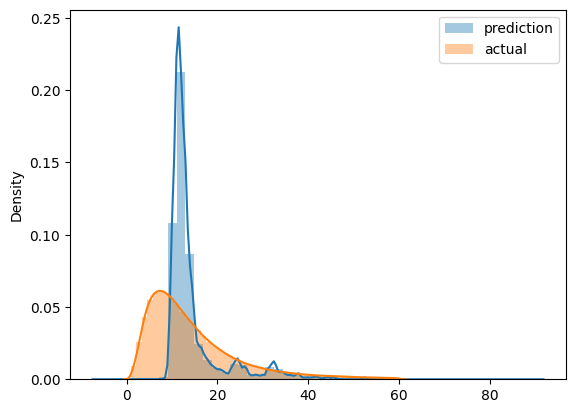

In [38]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

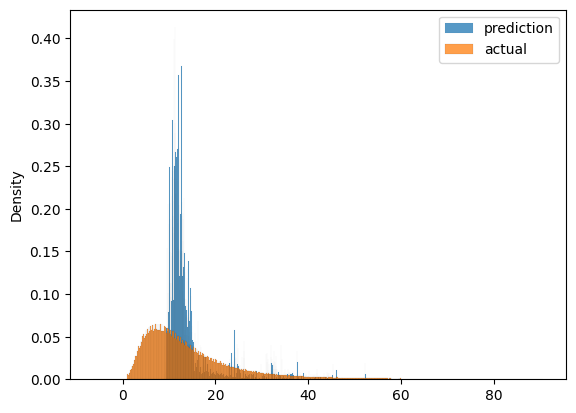

In [41]:
sns.histplot(y_pred, label='prediction',stat = 'density')
sns.histplot(y_train, label='actual',stat = 'density')

plt.legend()

In [46]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

8.279022574676906